In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
financial = pd.read_csv("data/schedule_P52.csv")

In [3]:
financial.columns

Index(['PILOT_FLY_OPS', 'OTH_FLT_FLY_OPS', 'TRAIN_FLY_OPS', 'PERS_EXP_FLY_OPS',
       'PRO_FLY_OPS', 'INTERCHG_FLY_OPS', 'FUEL_FLY_OPS', 'OIL_FLY_OPS',
       'RENTAL_FLY_OPS', 'OTHER_FLY_OPS', 'INS_FLY_OPS', 'BENEFITS_FLY_OPS',
       'INCIDENT_FLY_OPS', 'PAY_TAX_FLY_OPS', 'OTH_TAX_FLY_OPS',
       'OTHER_EXP_FLY_OPS', 'TOT_FLY_OPS', 'AIRFRAME_LABOR', 'ENGINE_LABOR',
       'AIRFRAME_REPAIR', 'ENGINE_REPAIRS', 'INTERCHG_CHARG',
       'AIRFRAME_MATERIALS', 'ENGINE_MATERIALS', 'AIRFRAME_ALLOW',
       'AIRFRAME_OVERHAULS', 'ENGINE_ALLOW', 'ENGINE_OVERHAULS',
       'TOT_DIR_MAINT', 'AP_MT_BURDEN', 'TOT_FLT_MAINT_MEMO',
       'NET_OBSOL_PARTS', 'AIRFRAME_DEP', 'ENGINE_DEP', 'PARTS_DEP',
       'ENG_PARTS_DEP', 'OTH_FLT_EQUIP_DEP', 'OTH_FLT_EQUIP_DEP_GRP_I',
       'FLT_EQUIP_A_EXP', 'FLY_OPS_EXP_I_A', 'TOT_AIR_OP_EXPENSES',
       'DEV_N_PREOP_EXP', 'OTH_INTANGIBLES', 'EQUIP_N_HANGAR_DEP',
       'G_PROP_DEP', 'CAP_LEASES_DEP', 'TOTAL_AIR_HOURS', 'AIR_DAYS_ASSIGN',
       'AIR_FUELS_I

 Each row in the dataframe corresponds to an aircraft type for a particular year, quarter, world region, and airline. We begin by limiting to domestic flights from 2000 to 2019.

In [4]:
financial_00_19 = financial.loc[(financial.YEAR <= 2019)&(financial.YEAR >= 2000)&(financial.REGION == 'D')]

# Rows of financial_00_19 are determined by YEAR, QUARTER, UNIQUE_CARRIER_NAME/UNIQUE_CARRIER, and AIRCRAFT_TYPE

We do not care about aircraft type, so we combine the aircraft types of each year-quarter-airline by summing columns.

In [5]:
# The variables we care about
variables = ['YEAR', 'QUARTER', 'UNIQUE_CARRIER_NAME', 'UNIQUE_CARRIER', 'AIRCRAFT_TYPE', 'TOT_AIR_OP_EXPENSES', 'TOTAL_AIR_HOURS', 'AIR_DAYS_ASSIGN', 'TOT_FLY_OPS', 'TOT_DIR_MAINT', 'ENGINE_LABOR', 'ENGINE_REPAIRS', 'AIRFRAME_LABOR', 'AIRFRAME_REPAIR']
# The numerical variables we care about
num_vars = ['TOT_AIR_OP_EXPENSES', 'TOTAL_AIR_HOURS', 'AIR_DAYS_ASSIGN', 'TOT_FLY_OPS', 'TOT_DIR_MAINT', 'ENGINE_LABOR', 'ENGINE_REPAIRS', 'AIRFRAME_LABOR', 'AIRFRAME_REPAIR']
# The variables whose values will uniquely specify each row in our new dataframe
row_id = ['YEAR', 'QUARTER', 'UNIQUE_CARRIER_NAME', 'UNIQUE_CARRIER']

expenses = financial_00_19.groupby(row_id)[num_vars].sum().reset_index()
             

In [6]:
expenses.sample(10)

,YEAR,QUARTER,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER,TOT_AIR_OP_EXPENSES,TOTAL_AIR_HOURS,AIR_DAYS_ASSIGN,TOT_FLY_OPS,TOT_DIR_MAINT,ENGINE_LABOR,ENGINE_REPAIRS,AIRFRAME_LABOR,AIRFRAME_REPAIR
293,2001,3,JetBlue Airways,B6,33482.73,0.00,0.00,29308.61,2363.04,0.0,0.00,635.37,1412.62
555,2003,1,United Parcel Service,5X,331200.00,46.91,17.34,188909.00,81272.00,986.0,9558.00,17391.00,8320.00
2928,2016,4,GoJet Airlines LLC d/b/a United Express,G7,45172.12,29.08,4.96,23117.54,15892.79,0.0,2887.79,1642.75,9560.61
1097,2006,2,Evergreen International Inc.,EZ,3724.26,0.00,0.00,3069.18,22.46,0.0,0.00,0.00,0.00
3353,2019,4,Polar Air Cargo Airways,PO,53806.02,3.38,0.34,53688.85,101.13,0.0,0.00,13.29,0.00
1621,2009,1,ExpressJet Airlines LLC,EV,182039.00,84.06,13.73,116308.00,45293.00,1219.0,14464.00,6707.00,16962.00
2667,2015,1,Compass Airlines,CP,24963.59,28.42,3.87,11967.52,11473.01,0.0,0.00,1482.25,8675.60
2337,2012,4,US Airways Inc.,US,1142281.98,201.25,27.97,901856.02,179388.63,0.0,58701.82,54474.56,51638.64
2086,2011,3,Comair Inc.,OH (1),53216.00,39.08,7.00,23554.00,15307.00,76.0,939.00,3456.00,6517.00
1517,2008,3,AirTran Airways Corporation,FL,541327.82,115.17,12.56,483109.20,44388.49,100.3,21479.79,5556.73,1675.37


Let's add a DATE column whose entries are the first day of each quarter. This will make graphing against time easier.

In [7]:
combine_times = lambda x: pd.Timestamp(x.YEAR,x.QUARTER*3-2,1)

expenses.insert(loc=0, column='DATE', value=expenses[['YEAR','QUARTER']].apply(combine_times, axis=1))

In [8]:
expenses.sample(2)

,DATE,YEAR,QUARTER,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER,TOT_AIR_OP_EXPENSES,TOTAL_AIR_HOURS,AIR_DAYS_ASSIGN,TOT_FLY_OPS,TOT_DIR_MAINT,ENGINE_LABOR,ENGINE_REPAIRS,AIRFRAME_LABOR,AIRFRAME_REPAIR
333,2001-10-01,2001,4,Horizon Air,QX,58468.0,0.0,0.00,40138.0,11778.0,652.0,1531.0,4026.0,2221.0
483,2002-10-01,2002,4,American Airlines Inc.,AA,1667977.0,475.7,60.18,1065969.0,227410.0,17053.0,54024.0,60436.0,25424.0


Now, lets calculate the ratio of maintenance costs to non-maintenance aircraft operating expenses and add this as a column of our dataframe. Hopefully this will help us identify spikes in maintenance costs that are not due to increased flight numbers. 

In [9]:
adj_maint = 100*expenses.TOT_DIR_MAINT/(expenses.TOT_AIR_OP_EXPENSES - expenses.TOT_DIR_MAINT)

In [10]:
expenses.insert(loc=5, column='ADJ_MAINT', value=adj_maint)

In [11]:
expenses.sample(5)

,DATE,YEAR,QUARTER,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER,ADJ_MAINT,TOT_AIR_OP_EXPENSES,TOTAL_AIR_HOURS,AIR_DAYS_ASSIGN,TOT_FLY_OPS,TOT_DIR_MAINT,ENGINE_LABOR,ENGINE_REPAIRS,AIRFRAME_LABOR,AIRFRAME_REPAIR
2518,2014-01-01,2014,1,Frontier Airlines Inc.,F9,5.248015,161876.92,33.03,3.68,145868.47,8071.72,0.00,460.57,3470.04,2329.93
3242,2019-01-01,2019,1,Miami Air International,GL,27.868306,14495.10,1.61,0.33,10702.15,3159.14,0.00,0.00,615.16,1503.44
398,2002-04-01,2002,2,AirTran Airways Corporation,FL,18.673066,107621.91,0.00,0.00,83582.81,16934.18,36.72,3723.58,3912.23,3621.92
1316,2007-04-01,2007,2,Southwest Airlines Co.,WN,16.424346,1335428.00,438.11,44.96,996254.00,188393.00,800.00,77371.00,33923.00,56075.00
1060,2006-01-01,2006,1,Mesa Airlines Inc.,YV,21.186976,213722.89,84.72,13.17,168485.15,37364.92,239.76,0.00,4423.10,14145.44


We will select a few airlines and graph their adjusted maintenance costs over time.

In [12]:
ups = expenses.loc[expenses.UNIQUE_CARRIER == '5X']
american = expenses.loc[expenses.UNIQUE_CARRIER == 'AA']
alaska = expenses.loc[expenses.UNIQUE_CARRIER == 'AS']
jetblue = expenses.loc[expenses.UNIQUE_CARRIER == 'B6']
delta = expenses.loc[expenses.UNIQUE_CARRIER == 'DL']
frontier = expenses.loc[expenses.UNIQUE_CARRIER == 'F9']
fedex = expenses.loc[expenses.UNIQUE_CARRIER == 'FX']
allegiant = expenses.loc[expenses.UNIQUE_CARRIER == 'G4']
spirit = expenses.loc[expenses.UNIQUE_CARRIER == 'NK']
united = expenses.loc[expenses.UNIQUE_CARRIER == 'UA']
southwest = expenses.loc[expenses.UNIQUE_CARRIER == 'WN']


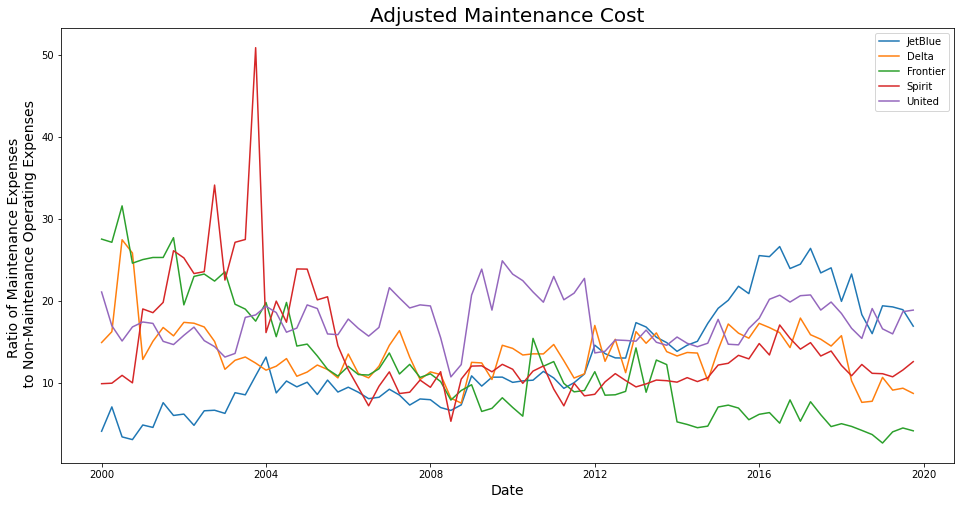

In [13]:
plt.figure(figsize=(16,8))

#plt.plot(ups.DATE, ups.ADJ_MAINT, label='UPS')
#plt.plot(american.DATE, american.ADJ_MAINT, label='American')
#plt.plot(alaska.DATE, alaska.ADJ_MAINT, label='Alaska')
plt.plot(jetblue.DATE, jetblue.ADJ_MAINT, label='JetBlue')
plt.plot(delta.DATE, delta.ADJ_MAINT, label='Delta')
plt.plot(frontier.DATE, frontier.ADJ_MAINT, label='Frontier')
#plt.plot(fedex.DATE, fedex.ADJ_MAINT, label='FedEx')
#plt.plot(allegiant.DATE, allegiant.ADJ_MAINT, label='Allegiant')
plt.plot(spirit.DATE, spirit.ADJ_MAINT, label='Spirit')
plt.plot(united.DATE, united.ADJ_MAINT, label='United')
#plt.plot(southwest.DATE, southwest.ADJ_MAINT, label='Southwest')


plt.xlabel("Date", fontsize = 14)
plt.ylabel("Ratio of Maintenance Expenses \n to Non-Maintenance Operating Expenses", fontsize = 14)

plt.title("Adjusted Maintenance Cost", fontsize = 20)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=14)

plt.legend()

plt.show()